Pour le slide =>
Process de création du model:
- non-linearity ?
- normalisation !!!!
- encodage !

In [1]:
import torch
from torch import nn

from sklearn.model_selection import train_test_split

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

In [2]:
# Device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

# 1. Data

In [3]:
# Import csv
# ! TODO Data à normaliser !!!!!!!!!!!
# df = pd.read_csv("./1_label_encoded.csv")
# df = pd.read_csv("./2_normalized_with_standard_scaler")
df = pd.read_csv("./2bis_normalized_with_minmax")
print(f"Nombre de classes:{len(df['label'].unique())}")
df 

Nombre de classes:10


,zcr,spectral_c,rolloff,mfcc1,mfcc2,mfcc3,mfcc4,mfcc5,mfcc6,mfcc7,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
0,0.123336,0.279024,0.379738,0.535851,0.527700,0.733820,0.427236,0.582802,0.738526,0.291923,...,0.251166,0.553447,0.444000,0.393171,0.253120,0.203955,0.192022,0.255630,0.167173,0
1,0.117516,0.195111,0.247445,0.576112,0.647334,0.683731,0.661334,0.645294,0.595536,0.564770,...,0.350452,0.603173,0.690405,0.576520,0.516506,0.498246,0.375323,0.504069,0.344948,0
2,0.377738,0.442338,0.502428,0.685293,0.499648,0.465824,0.687576,0.128293,0.784934,0.257327,...,0.570814,0.158824,0.489705,0.267625,0.489999,0.276050,0.625960,0.312803,0.495555,0
3,0.227272,0.322576,0.402888,0.570289,0.599531,0.533521,0.580885,0.263909,0.563838,0.433889,...,0.504514,0.683764,0.243667,0.573069,0.497766,0.533736,0.353868,0.644152,0.444728,0
4,0.053878,0.150298,0.197079,0.421457,0.580864,0.762815,0.350984,0.669755,0.686141,0.444497,...,0.134608,0.291878,0.000000,0.176496,0.038778,0.248198,0.226079,0.323131,0.361032,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.177686,0.295427,0.361840,0.774499,0.675625,0.625905,0.305442,0.599055,0.359236,0.561055,...,0.393048,0.688182,0.356062,0.433818,0.436368,0.451116,0.340047,0.450424,0.523856,9
996,0.458842,0.575485,0.646875,0.804332,0.401996,0.587399,0.470466,0.668863,0.467798,0.680108,...,0.399640,0.642410,0.292366,0.535700,0.486176,0.425427,0.350013,0.467592,0.424442,9
997,0.532156,0.628011,0.657484,0.831042,0.328893,0.526991,0.509780,0.668572,0.416760,0.672938,...,0.345718,0.708885,0.360996,0.571183,0.573996,0.528432,0.382535,0.460631,0.421368,9
998,0.392673,0.436055,0.474161,0.617011,0.516060,0.364628,0.635304,0.300709,0.675302,0.230977,...,0.467137,0.367064,0.414485,0.439570,0.453656,0.288100,0.688682,0.355600,0.530478,9


In [4]:
# df to numpy

y = df['label'].to_numpy()
x = df.drop(columns=['label']).to_numpy() # ! Type issue ?

print("X shape =>",x.shape,"\ny shape =>", y.shape)
y[:3], x[:3]

X shape => (1000, 23) 
y shape => (1000,)


(array([0, 0, 0]),
 array([[0.12333608, 0.27902414, 0.37973807, 0.53585125, 0.52769956,
         0.73381962, 0.42723603, 0.582802  , 0.7385258 , 0.29192318,
         0.54104936, 0.18451954, 0.41837842, 0.10666695, 0.25116597,
         0.55344705, 0.44399951, 0.39317137, 0.2531201 , 0.20395521,
         0.19202179, 0.25563021, 0.16717333],
        [0.11751609, 0.19511083, 0.24744539, 0.57611216, 0.64733438,
         0.68373102, 0.66133395, 0.64529418, 0.59553638, 0.56477002,
         0.42799826, 0.19891162, 0.57979981, 0.49524745, 0.350452  ,
         0.60317264, 0.69040471, 0.57651991, 0.51650559, 0.49824587,
         0.37532347, 0.50406911, 0.34494777],
        [0.37773838, 0.44233771, 0.50242779, 0.68529269, 0.49964817,
         0.46582438, 0.68757613, 0.12829269, 0.78493388, 0.25732653,
         0.57915378, 0.43274289, 0.44728276, 0.40673746, 0.57081404,
         0.15882351, 0.48970465, 0.26762503, 0.48999948, 0.27605026,
         0.62596007, 0.31280344, 0.4955547 ]]))

In [5]:
# numpy to tensor

# x = torch.from_numpy(x).type(torch.float64)
# y = torch.from_numpy(y).type(torch.float64)
x = torch.from_numpy(x).type(torch.float32)
# y = torch.from_numpy(y).type(torch.float32)
y = torch.from_numpy(y).type(torch.long)

# x = torch.from_numpy(x)
# y = torch.from_numpy(y)

x[:3], y[:3]

(tensor([[0.1233, 0.2790, 0.3797, 0.5359, 0.5277, 0.7338, 0.4272, 0.5828, 0.7385,
          0.2919, 0.5410, 0.1845, 0.4184, 0.1067, 0.2512, 0.5534, 0.4440, 0.3932,
          0.2531, 0.2040, 0.1920, 0.2556, 0.1672],
         [0.1175, 0.1951, 0.2474, 0.5761, 0.6473, 0.6837, 0.6613, 0.6453, 0.5955,
          0.5648, 0.4280, 0.1989, 0.5798, 0.4952, 0.3505, 0.6032, 0.6904, 0.5765,
          0.5165, 0.4982, 0.3753, 0.5041, 0.3449],
         [0.3777, 0.4423, 0.5024, 0.6853, 0.4996, 0.4658, 0.6876, 0.1283, 0.7849,
          0.2573, 0.5792, 0.4327, 0.4473, 0.4067, 0.5708, 0.1588, 0.4897, 0.2676,
          0.4900, 0.2761, 0.6260, 0.3128, 0.4956]]),
 tensor([0, 0, 0]))

In [6]:
# split dataset

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

(torch.Size([800, 23]),
 torch.Size([200, 23]),
 torch.Size([800]),
 torch.Size([200]))

# 2. Model

In [7]:
# ! try different combination of deep, wide, dropout, other activation function than Relu 

class MusicClassifier(nn.Module):
    def __init__(self, input_features, output_features, hidden_unit):
        """
        Initializes all required hyperparameters for a multi-class classification model.

        Args:
            input_features (int): Number of input features to the model.
            out_features (int): Number of output features of the model
              (how many classes there are).
            hidden_units (int): Number of hidden units between layers, default 8.
        """
        super().__init__()
        # ! Try RELU
        self.linear_layer_stack = nn.Sequential(
            nn.Linear(in_features=input_features, out_features=hidden_unit, dtype=torch.float32),
            nn.ReLU(),
            nn.Dropout(p=0.2),
            nn.Linear(in_features=hidden_unit, out_features=hidden_unit, dtype=torch.float32),
            nn.ReLU(),
            nn.Dropout(p=0.2),
            nn.Linear(in_features=hidden_unit, out_features=output_features, dtype=torch.float32)
        )
    def forward(self, x):
        return self.linear_layer_stack(x)

torch.manual_seed(42)
model_0 = MusicClassifier(input_features=23, output_features=10, hidden_unit=100).to(device)

model_0

MusicClassifier(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=23, out_features=100, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.2, inplace=False)
    (3): Linear(in_features=100, out_features=100, bias=True)
    (4): ReLU()
    (5): Dropout(p=0.2, inplace=False)
    (6): Linear(in_features=100, out_features=10, bias=True)
  )
)

In [8]:
# Loss and optimizer

loss_fn = nn.CrossEntropyLoss()
# optimizer = torch.optim.SGD(model_0.parameters(), lr=0.1) # ! Try Adam
optimizer = torch.optim.Adam(model_0.parameters(), lr=0.001) # It's better

def accuracy_fn(y_true, y_pred):
    correct = torch.eq(input=y_true, other=y_pred).sum().item() # torch.eq() calculates where two tensors are equal
    acc = (correct / len(y_pred)) * 100 # Calcul simple de pourcentage
    return acc

In [9]:
# Quick forward pass
y_logits_quick_test = model_0(X_test.to(device))
torch.softmax(y_logits_quick_test, dim=1).argmax(dim=1)

tensor([4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 6, 4, 4, 4, 4, 4, 4,
        4, 4, 4, 6, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 4, 4, 4,
        4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 4, 4, 4, 4, 4, 4, 4,
        4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
        4, 4, 4, 4, 4, 4, 4, 4, 4, 9, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
        4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
        4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 0, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 0,
        4, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
        4, 4, 4, 4, 4, 4, 4, 4], device='cuda:0')

# 3. Training

In [10]:
torch.manual_seed(42)

epochs = 5000

loss_history = []
acc_history = []
test_loss_history = []
test_acc_history = []

X_train = X_train.to(device)
y_train = y_train.to(device)
X_test = X_test.to(device)
y_test = y_test.to(device)

for epoch in range(epochs):
    '''
    Train
    '''
    model_0.train()

    # 1. Forward pass
    y_logits = model_0(X_train)
    y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1)

    # 2. Metrics
    loss = loss_fn(y_logits,
                   y_train)
    acc = accuracy_fn(y_true=y_train,
                      y_pred=y_pred)
    
    # 2.1 Save metrics
    loss_history.append(loss.cpu().detach().numpy())
    acc_history.append(acc)

    # 3. Zero Grad
    optimizer.zero_grad()

    # 4. Backpropagation
    loss.backward()

    # 5. Optimmizer step
    optimizer.step()

    '''
    Test
    '''
    model_0.eval()

    with torch.inference_mode():
        # 1. Forward pass
        y_test_logits = model_0(X_test)
        y_test_pred = torch.softmax(y_test_logits, dim=1).argmax(dim=1)

        # 2. Metrics
        test_loss = loss_fn(y_test_logits,
                            y_test)
        test_acc = accuracy_fn(y_pred=y_test_pred,
                               y_true=y_test)
        
        # 2.1 Save metrics
        test_loss_history.append(test_loss.cpu().detach().numpy())
        test_acc_history.append(test_acc)
    
    # Print out what's happening
    if epoch % 100 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Acc: {acc:.2f}% | Test Loss: {test_loss:.5f}, Test Acc: {test_acc:.2f}%")

Epoch: 0 | Loss: 2.30459, Acc: 10.62% | Test Loss: 2.29855, Test Acc: 7.50%
Epoch: 100 | Loss: 1.56798, Acc: 43.75% | Test Loss: 1.59597, Test Acc: 42.00%
Epoch: 200 | Loss: 1.33990, Acc: 52.00% | Test Loss: 1.37146, Test Acc: 52.00%
Epoch: 300 | Loss: 1.24064, Acc: 57.38% | Test Loss: 1.26770, Test Acc: 54.50%
Epoch: 400 | Loss: 1.12237, Acc: 61.12% | Test Loss: 1.18896, Test Acc: 59.50%
Epoch: 500 | Loss: 1.04734, Acc: 63.12% | Test Loss: 1.14685, Test Acc: 60.00%
Epoch: 600 | Loss: 1.00964, Acc: 63.62% | Test Loss: 1.11844, Test Acc: 62.50%
Epoch: 700 | Loss: 0.92401, Acc: 66.88% | Test Loss: 1.10513, Test Acc: 61.50%
Epoch: 800 | Loss: 0.90488, Acc: 68.12% | Test Loss: 1.09142, Test Acc: 63.00%
Epoch: 900 | Loss: 0.84458, Acc: 70.00% | Test Loss: 1.09065, Test Acc: 61.50%
Epoch: 1000 | Loss: 0.81256, Acc: 68.75% | Test Loss: 1.09364, Test Acc: 61.00%
Epoch: 1100 | Loss: 0.72282, Acc: 73.50% | Test Loss: 1.10414, Test Acc: 60.50%
Epoch: 1200 | Loss: 0.70264, Acc: 75.25% | Test Loss:

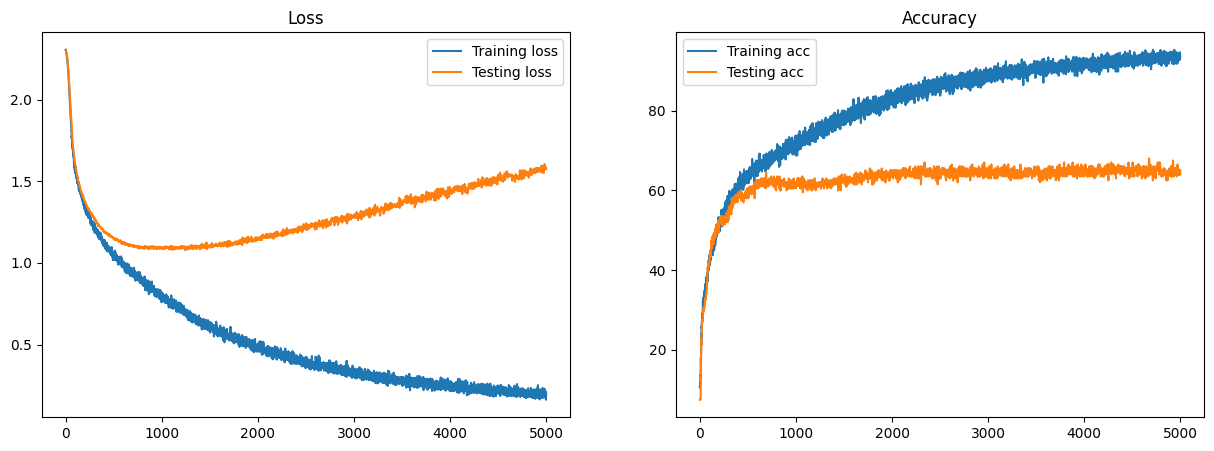

In [11]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(range(epochs), loss_history, label="Training loss")
plt.plot(range(epochs), test_loss_history, label="Testing loss")
plt.legend()
plt.title("Loss")

plt.subplot(1,2,2)
plt.plot(range(epochs), acc_history, label="Training acc")
plt.plot(range(epochs), test_acc_history, label="Testing acc")
plt.legend()
plt.title("Accuracy")

plt.show()